In [1]:
df <- read.delim('../data/premodification.csv', sep=',', header=TRUE)

In [2]:
head(df)

,token,normalized,period,head.cat,head.word,mod
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,fine,fine,0,accessories,jewellery,E
2,houfhold,household,0,furniture,furniture,D
3,glafs,glass,0,decoration,frame,D
4,tree,walnut-tree,0,furniture,chair,D
5,italian,italian,0,decoration,picture,D
6,kitchen,kitchen,0,furniture,furniture,D


In [3]:
df$mod <- as.factor(df$mod)
levels(df$mod) <- c(1,0)
# 1 means -> isEval
head(df)

,token,normalized,period,head.cat,head.word,mod
,<chr>,<chr>,<int>,<chr>,<chr>,<fct>
1,fine,fine,0,accessories,jewellery,0
2,houfhold,household,0,furniture,furniture,1
3,glafs,glass,0,decoration,frame,1
4,tree,walnut-tree,0,furniture,chair,1
5,italian,italian,0,decoration,picture,1
6,kitchen,kitchen,0,furniture,furniture,1


In [4]:
df$period <- factor(df$period, ordered=TRUE)

In [5]:
df$head.cat <- as.factor(df$head.cat)

In [6]:
str(df)

'data.frame':	168417 obs. of  6 variables:
 $ token     : chr  "fine" "houfhold" "glafs" "tree" ...
 $ normalized: chr  "fine" "household" "glass" "walnut-tree" ...
 $ period    : Ord.factor w/ 4 levels "0"<"1"<"2"<"3": 1 1 1 1 1 1 1 1 1 1 ...
 $ head.cat  : Factor w/ 9 levels "accessories",..: 1 6 5 6 5 6 6 6 6 6 ...
 $ head.word : chr  "jewellery" "furniture" "frame" "chair" ...
 $ mod       : Factor w/ 2 levels "1","0": 2 1 1 1 1 1 1 1 1 1 ...


In [7]:
library(lme4) # necessary for model fitting: glmer
library(effects) # necessary for making effect plots

Loading required package: Matrix

Warning message:
“package ‘effects’ was built under R version 4.1.2”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 4.1.2”
lattice theme set by effectsTheme()
See ?effectsTheme for details.



In [8]:
m1 <- glm(mod ~ period, data = df, family = binomial)
summary(m1)


Call:
glm(formula = mod ~ period, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8682  -0.8682  -0.8647   1.5220   1.6182  

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -0.848912   0.006709 -126.537  < 2e-16 ***
period.L     0.147054   0.015514    9.479  < 2e-16 ***
period.Q    -0.087961   0.013418   -6.556 5.54e-11 ***
period.C     0.013917   0.010926    1.274    0.203    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 208080  on 168416  degrees of freedom
Residual deviance: 207976  on 168413  degrees of freedom
AIC: 207984

Number of Fisher Scoring iterations: 4


In [9]:
208080 / 168416 <= 1.4

[1] TRUE

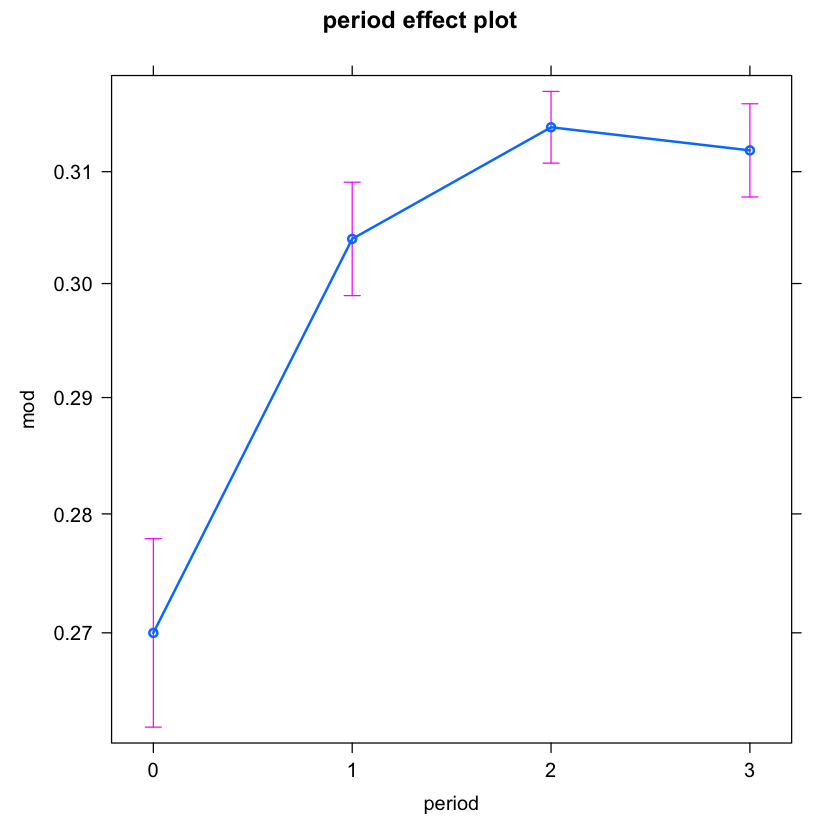

In [10]:
plot(effect("period", m1))


Call:
glm(formula = mod ~ period + head.cat, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1918  -0.9629  -0.6005   1.3817   1.9873  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.06148    0.03811  -1.613 0.106697    
period.L            -0.14657    0.01665  -8.804  < 2e-16 ***
period.Q            -0.04647    0.01398  -3.324 0.000888 ***
period.C             0.05848    0.01130   5.175 2.28e-07 ***
head.catanim/acce   -1.51423    0.06322 -23.950  < 2e-16 ***
head.catappl/uten   -1.15519    0.05336 -21.650  < 2e-16 ***
head.catclot/fabr   -0.87611    0.05286 -16.574  < 2e-16 ***
head.catdecoration  -0.51939    0.04254 -12.208  < 2e-16 ***
head.catfurniture   -1.65526    0.04026 -41.111  < 2e-16 ***
head.catinstrument  -0.38557    0.05753  -6.702 2.06e-11 ***
head.catreal estate -0.35813    0.03860  -9.279  < 2e-16 ***
head.cattableware   -0.97184    0.04526 -21.472  < 2e-16 ***
--

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,198699.6,198723.6,NA,NA
period,3,198871.1,198889.1,171.5249,5.962932e-37
head.cat,8,207975.6,207983.6,9276.0044,0.000000e+00


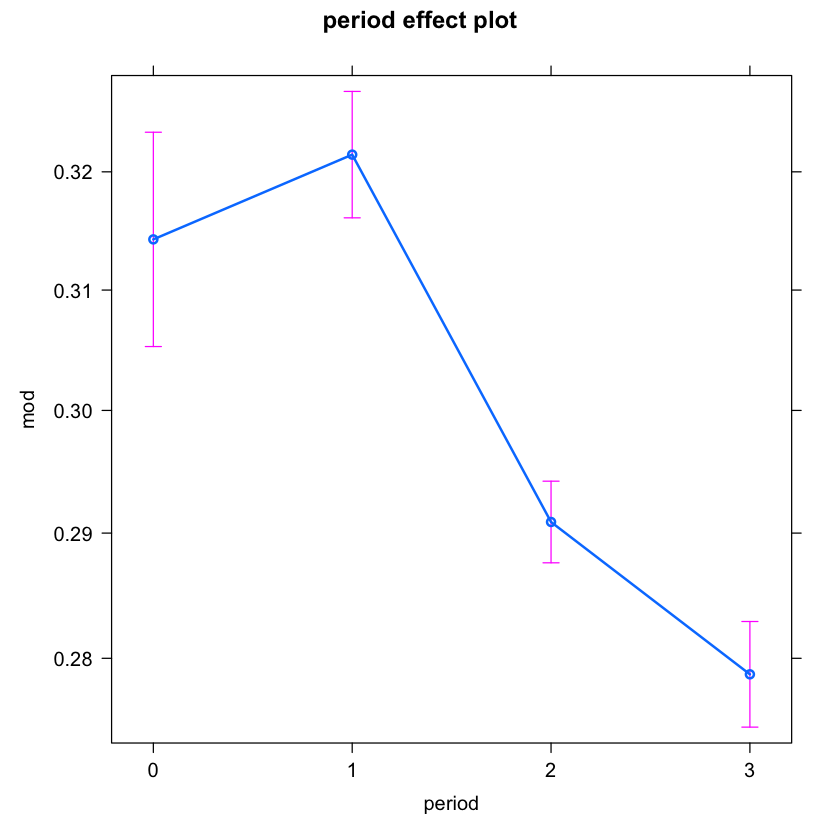

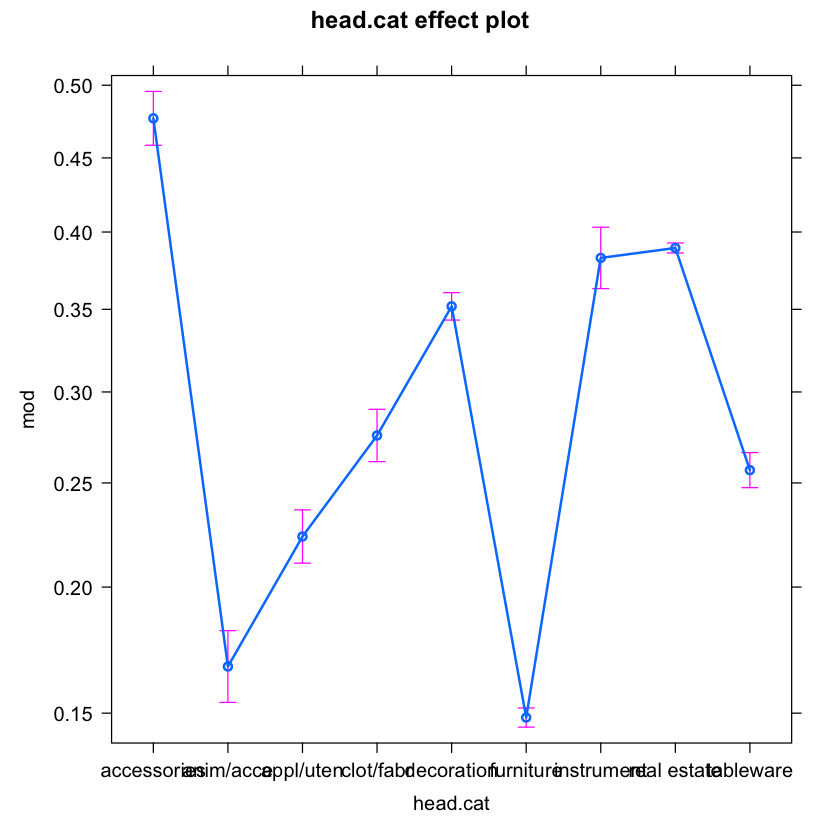

In [11]:
m2 <- glm(mod ~ period + head.cat, data = df, family = binomial)
summary(m2)
drop1(m2, test="Chisq")
plot(effect("period", m2))
plot(effect("head.cat", m2))

In [12]:
m3 <- glm(mod ~ head.cat * period, data = df, family = binomial)
summary(m3)
drop1(m3, test="Chisq")

pdf("../figures/effect_grid.pdf")
effect.p <-  predictorEffect("period", m3)
plot(effect.p, 
     lines=list(multiline=F),
     as.table=TRUE)
dev.off()


Call:
glm(formula = mod ~ head.cat * period, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2459  -0.9623  -0.6374   1.3901   2.1571  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -0.333872   0.047872  -6.974 3.07e-12 ***
head.catanim/acce            -1.204809   0.106033 -11.363  < 2e-16 ***
head.catappl/uten            -0.879025   0.062755 -14.007  < 2e-16 ***
head.catclot/fabr            -0.701075   0.061928 -11.321  < 2e-16 ***
head.catdecoration           -0.297974   0.052097  -5.720 1.07e-08 ***
head.catfurniture            -1.410153   0.050169 -28.108  < 2e-16 ***
head.catinstrument           -0.369938   0.080537  -4.593 4.36e-06 ***
head.catreal estate           0.040997   0.049619   0.826 0.408675    
head.cattableware            -0.556179   0.054678 -10.172  < 2e-16 ***
period.L                      0.923361   0.108609   8.502  < 2e-16 ***
period.Q      

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,196212.8,196284.8,NA,NA
head.cat:period,24,198699.6,198723.6,2486.856,0


pdf 
  2

In [13]:
anova(m1, m2, test='LRT')
anova(m2, m3, test='LRT')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168413,207975.6,NA,NA,NA
2,168405,198699.6,8,9276.004,0


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168405,198699.6,NA,NA,NA
2,168381,196212.8,24,2486.856,0


In [14]:
AIC(m1)
AIC(m2)
AIC(m3)

[1] 207983.6

[1] 198723.6

[1] 196284.8